In [1]:
%run setup.py
import tqdm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
import lightkurve

In [3]:
# koi = pd.read_csv('../data/koi.csv')
toi = pd.read_csv('../data/toi.csv')

In [4]:
from astropy.stats import BoxLeastSquares

def high_pass(t, y, width=3.):
    y_low = gaussian_filter(y, width)
    return y - y_low

def get_kepler_lc(kic_id):
    file = glob.glob(f'../data/lightcurves/Kepler/*{kic_id}.txt')[0]
    t, y = np.loadtxt(file, usecols=(0,1)).T
    return t, y
    
def preprocess_lc(t, y):
    y = high_pass(t, y)
    lc = lk.LightCurve(t, y).remove_outliers()
    return lc.time, lc.flux

In [4]:
toi_dsct = toi[toi['dsct'] == True].sort_values('Period (days)', ascending=False)
toi_dsct[['TIC ID', 'Period (days)']]

,TIC ID,Period (days)
395,309402106,216.244995
565,372913430,13.477940
470,295599256,7.143860
519,120269103,6.597550
461,255704097,6.015240
459,202563254,4.473330
477,80275202,3.664650
474,89759617,3.330410
452,156987351,3.062959
488,409934330,2.488964


In [46]:
import lightkurve as lk

# lc = lk.TessLightCurveFile('../data/lightcurves/TESS/372913430.fits').FLUX.remove_nans()
# t, y = lc.time, lc.flux
t, y = np.loadtxt('../data/lightcurves/eleanor/372913430.csv', usecols=(0,1)).T
t, y = preprocess_lc(t, y)
t = np.asarray(t, dtype='float64')
y = np.asarray(y, dtype='float64')

In [5]:
import lightkurve as lk

lc = lk.search_lightcurvefile('TOI 2143', mission='TESS').download_all().stitch().remove_nans()
t, y = lc.time, lc.flux
t = np.asarray(t, dtype='float64')
y = np.asarray(y, dtype='float64')

/Users/daniel/anaconda3/envs/maelstrom/lib/python3.6/site-packages/lightkurve/collections.py:213: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


In [3]:
import lightkurve as lk

lc = lk.search_lightcurvefile('KIC 9773821', mission='Kepler').download_all().stitch()

/Users/daniel/anaconda3/envs/maelstrom/lib/python3.6/site-packages/lightkurve/collections.py:213: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


In [4]:
lc = lc.remove_nans()

In [5]:
t, y = lc.time, lc.flux
t = np.asarray(t, dtype='float64')
y = np.asarray(y, dtype='float64')

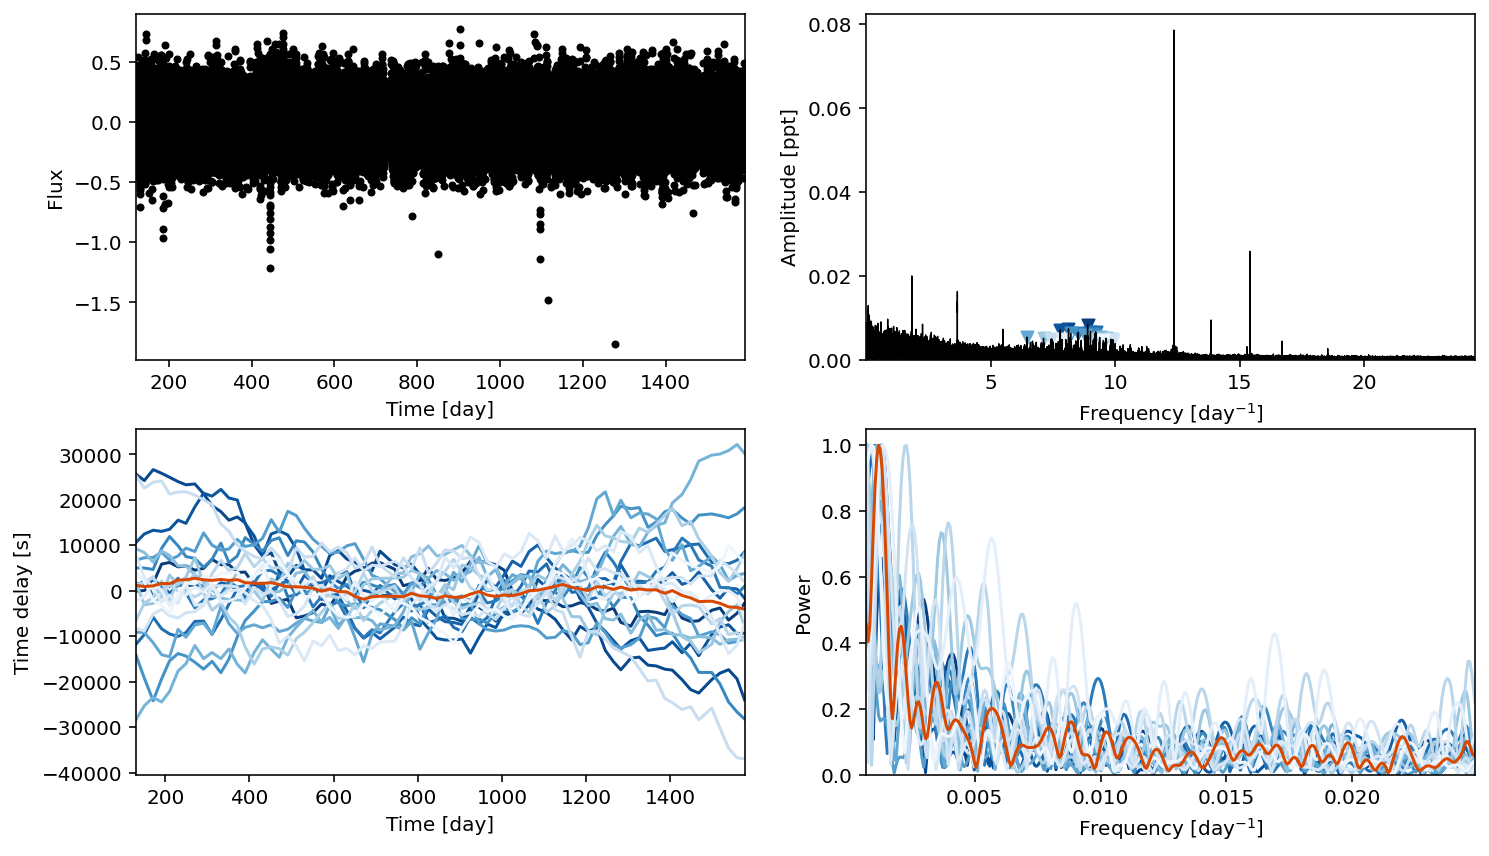

In [24]:
ms = Maelstrom(t, y, fmin=6, fmax=10, max_peaks=20)
ax = ms.first_look(segment_size=20);
# ax[1].set_xlim(0,30)
# ax[3].axvline(1./koi_period, c='g', linestyle='dashed')

In [29]:
%matplotlib inline

(0.0, 0.0075)

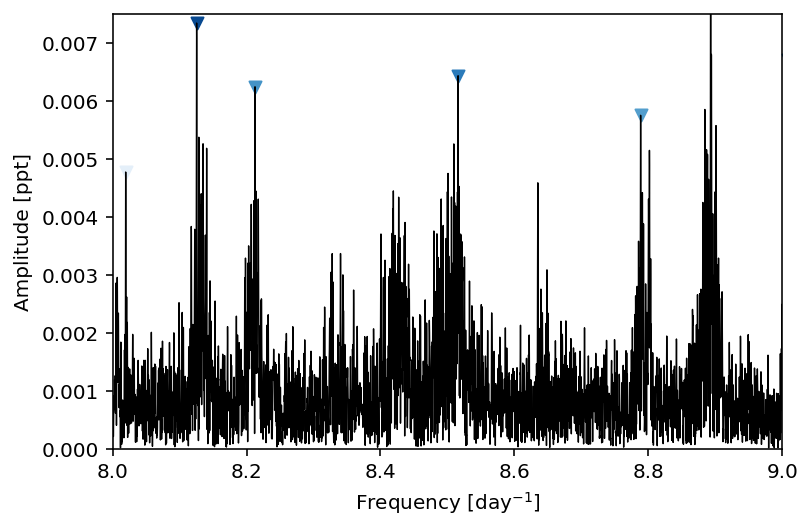

In [32]:
ax = ms.plot_periodogram();
ax.set_xlim(8, 9)
ax.set_ylim(None, 0.0075)

In [19]:
ms.freq

array([8.89307247, 8.12543043, 5.48587547, 7.79798007, 9.00806074,
       9.21782017, 8.51587903, 8.21260325, 9.20070179, 8.7884846 ,
       6.45177751, 9.37893558, 9.62676339, 7.12121051, 9.13837019,
       9.82796078, 8.01945623, 7.43316529, 9.9104851 , 7.87129562])

In [20]:
time, flux = ms.time, ms.flux
freq, weight = ms.freq, ms.get_weights(norm=False)

In [33]:
pg = ms.period_search()

In [34]:
periods = [5.589479]
periods = np.linspace(1, 10, 50)
res = pg.fit([481.93])

100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


In [35]:
res

[[(-61009.651421638315,
   {'period': array(481.93),
    'nu': array(8.8930732),
    'phi_angle__': array([-4.41132099, -0.73501507]),
    'logasini_interval__': array(0.19544358),
    'drift': array(-1.0096582),
    'phi': array(-1.73589977),
    'logasini': array(3.79032646),
    'w': array([-0.00036747, -0.01099065, -0.00015465]),
    'phase': array(-1.60421823)})],
 [(-61010.22388968152,
   {'period': array(481.93),
    'nu': array(8.12543001),
    'phi_angle__': array([-2.14021372, -3.92676481]),
    'logasini_interval__': array(0.01221736),
    'drift': array(-5.18520915e-07),
    'phi': array(-2.6425714),
    'logasini': array(3.47497601),
    'w': array([-4.63207626e-03,  5.72054739e-03,  3.93271885e-07]),
    'phase': array(2.25143972)})],
 [(-61012.37329234868,
   {'period': array(481.93),
    'nu': array(7.79798133),
    'phi_angle__': array([-4.44121836, -0.52486775]),
    'logasini_interval__': array(0.00053187),
    'drift': array(-1.60477887),
    'phi': array(-1.6884317

In [36]:
np.exp(3.52)

33.78442846384956

In [15]:
np.exp(2.51059719)

12.312280636319974

In [18]:
from maelstrom.utils import mass_function
import astropy.units as u

mf = mass_function(5.589479*u.day, 12.312280636319974 * u.s)
mass = (mf.to(u.M_jup))**(1/3) * ((1.6*u.M_sun).to(u.M_jup))**(2/3)
mass.to(u.M_sun)

<Quantity 0.5476022 solMass>

In [58]:
(16.234722 * u.R_earth).to(u.R_sun) / (1.6 * u.R_sun)


<Quantity 0.09302383>

In [44]:
np.exp(3.45885038)

31.780420099146262

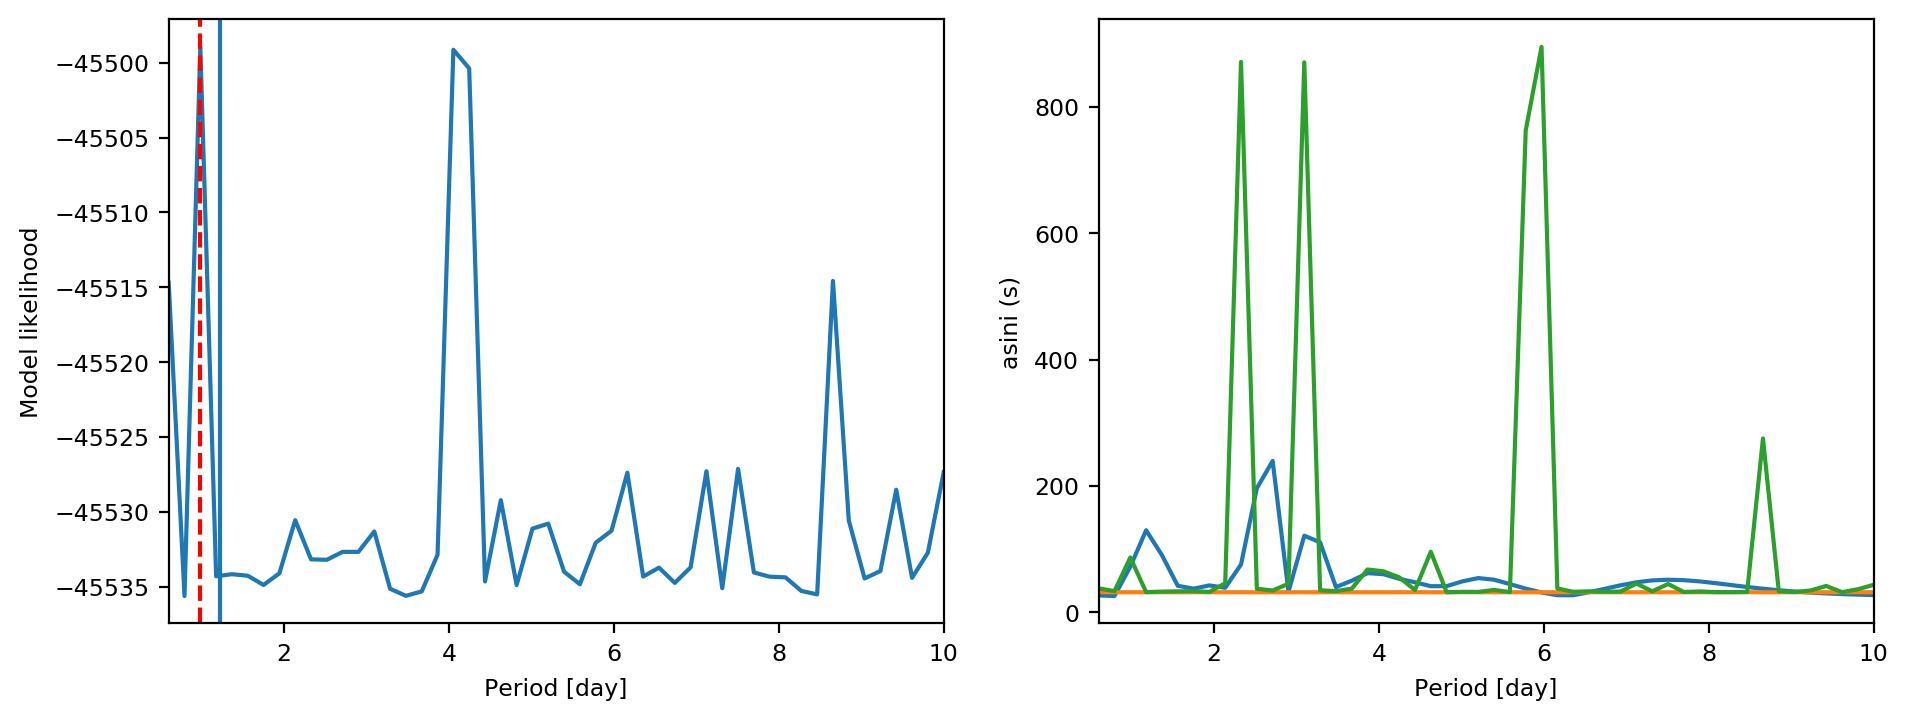

In [26]:
ax = pg.diagnose()

ax[0].axvline(1.219868)

In [16]:
from maelstrom.utils import mass_function
import astropy.units as u

mf = mass_function(1.21*u.day, 31.774026204097503 * u.s)
mass = (mf.to(u.M_jup))**(1/3) * ((1.6*u.M_sun).to(u.M_jup))**(2/3)
mass.to(u.M_sun)

<Quantity 3.91973072 solMass>

In [29]:
mass.to(u.M_sun)

<Quantity 3.91973072 solMass>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12fd45f50>,
      dtype=object)

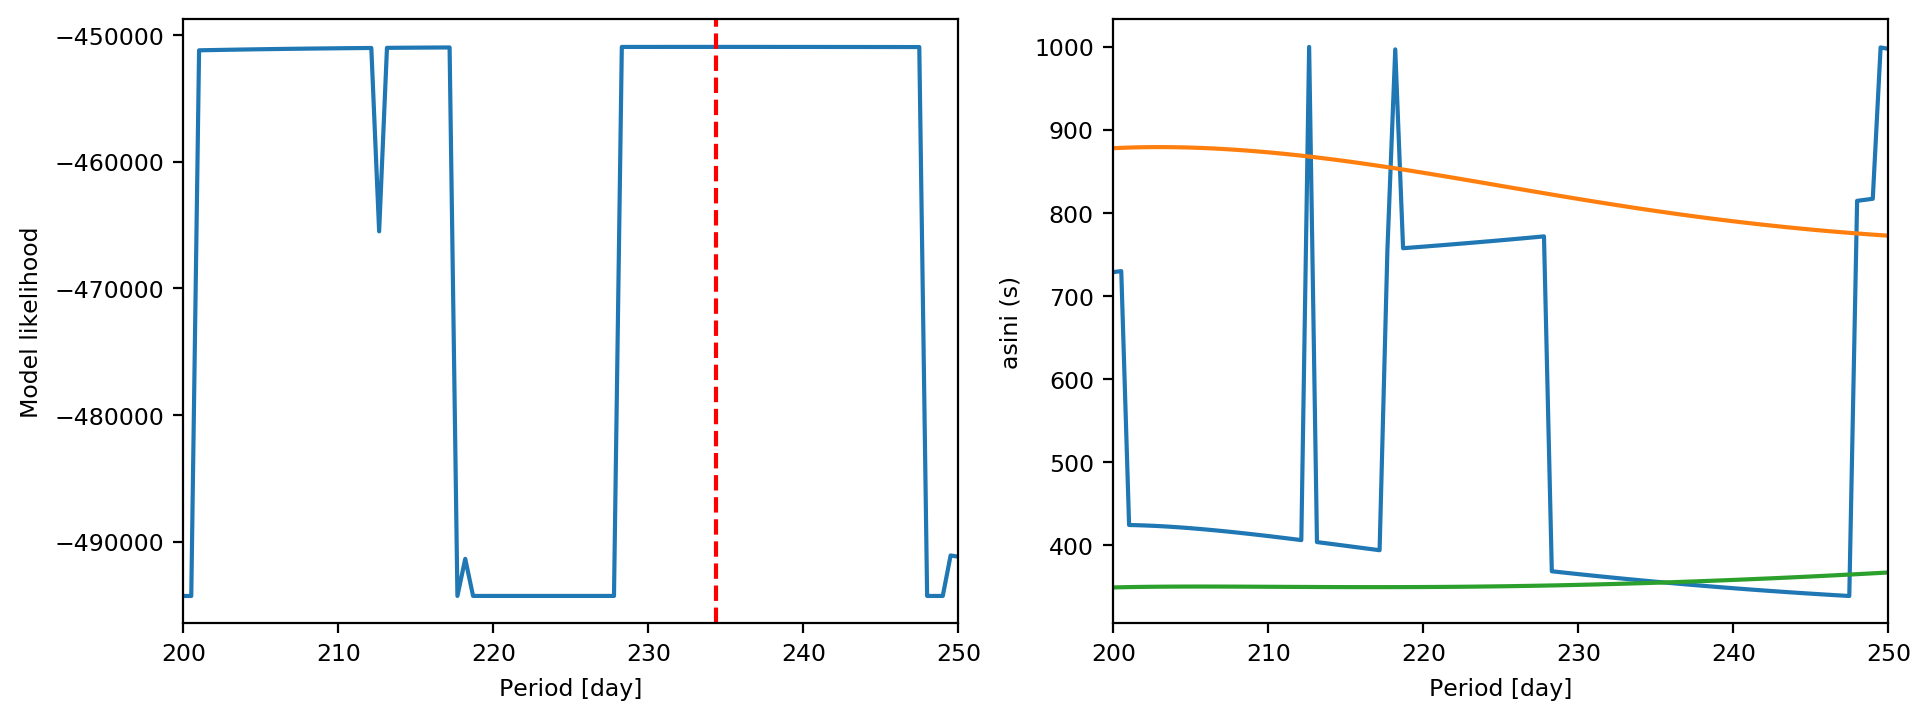

In [11]:
flux = (flux / 1e3) + 1

In [12]:
time += 2457000

In [20]:
flat_flux = lc.flatten().flux

In [14]:
midtime = time[np.argmin(flux)]

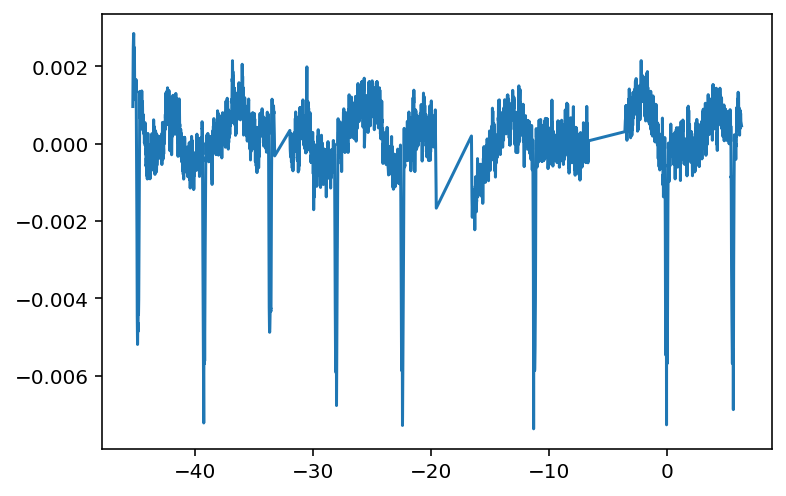

In [21]:
plt.plot(time - midtime, flux - flat_flux)
# plt.axvline(2459012.016018)

(2459027.849023855, 2459029.849023855)

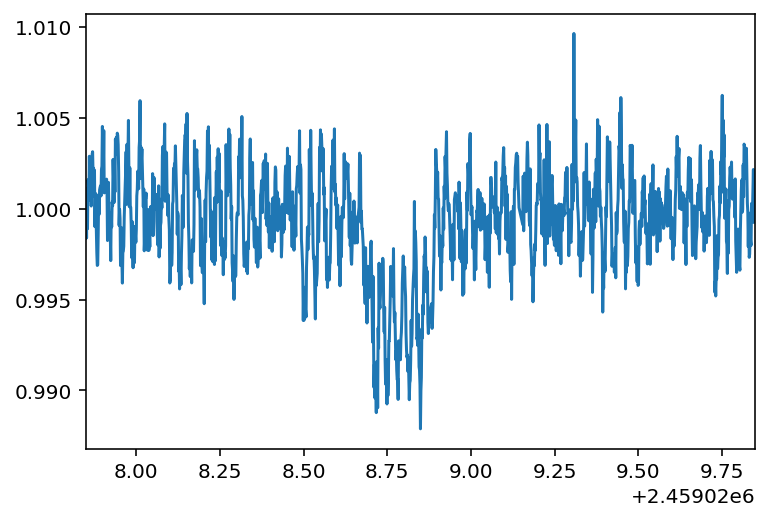

In [18]:
plt.plot(time, flux)
plt.xlim(midtime-1, midtime+1)

In [22]:
np.savetxt('TOI2143.txt', list(zip(time - midtime, flux - flat_flux, lc.flux_err)))

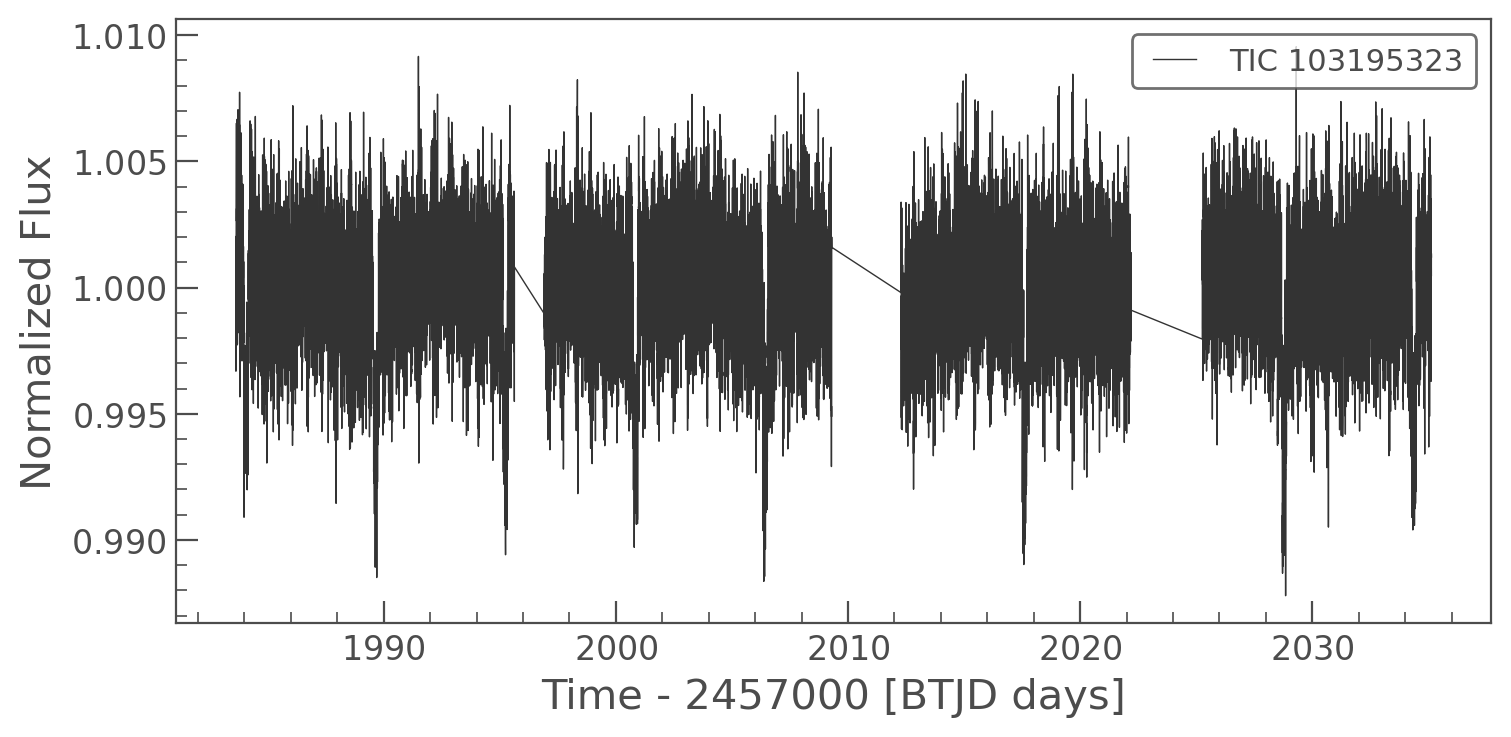

In [25]:
lc.plot()

In [34]:
from astroquery.mast import Observations, Catalogs

result = Catalogs.query_criteria(catalog="Tic", ID=103195323).to_pandas()


/Users/daniel/anaconda3/envs/maelstrom/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daniel/anaconda3/envs/maelstrom/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'KIC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
result

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
0,103195323,20190415,NaN,4510-00152-1,826-007601,04101752+7510152,NaN,J041017.52+751015.3,549998638456973184,60779836,...,NaN,0.756104,0.628545,62.572982,75.170931,0.021598,0.019546,1,0,57198335


In [55]:
result.dec

0    75.170901
Name: dec, dtype: float64

In [37]:
for col in result.columns:
    print(col)

ID
version
HIP
TYC
UCAC
TWOMASS
SDSS
ALLWISE
GAIA
APASS
KIC
objType
typeSrc
ra
dec
POSflag
pmRA
e_pmRA
pmDEC
e_pmDEC
PMflag
plx
e_plx
PARflag
gallong
gallat
eclong
eclat
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag
e_gmag
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
TWOMflag
prox
w1mag
e_w1mag
w2mag
e_w2mag
w3mag
e_w3mag
w4mag
e_w4mag
GAIAmag
e_GAIAmag
Tmag
e_Tmag
TESSflag
SPFlag
Teff
e_Teff
logg
e_logg
MH
e_MH
rad
e_rad
mass
e_mass
rho
e_rho
lumclass
lum
e_lum
d
e_d
ebv
e_ebv
numcont
contratio
disposition
duplicate_id
priority
eneg_EBV
epos_EBV
EBVflag
eneg_Mass
epos_Mass
eneg_Rad
epos_Rad
eneg_rho
epos_rho
eneg_logg
epos_logg
eneg_lum
epos_lum
eneg_dist
epos_dist
distflag
eneg_Teff
epos_Teff
TeffFlag
gaiabp
e_gaiabp
gaiarp
e_gaiarp
gaiaqflag
starchareFlag
VmagFlag
BmagFlag
splists
e_RA
e_Dec
RA_orig
Dec_orig
e_RA_orig
e_Dec_orig
raddflag
wdflag
objID
